#### Select two classes and features which are linearly seprable from Iris dataset 

In [28]:
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt 
from mpl_toolkits import mplot3d


iris = datasets.load_iris()
X = iris.data[0:100, [0, 1]]
X1 = iris.data[0:100, [2, 3]]
X2 = iris.data[0:100, [0, 2]]
X3 = iris.data[0:100, [0, 3]]
X4 = iris.data[0:100, [1, 2]]
X5 = iris.data[0:100, [1, 3]]

y = iris.target[50:150]

#### Classes and two Features are linearly seprable.

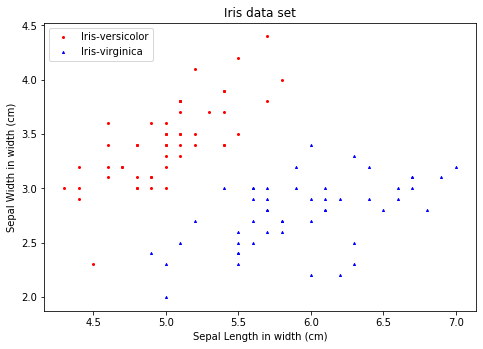

In [30]:
fig = plt.figure()


ax=fig.add_axes([0,0,1,1])

ax.set_title('Iris data set')

ax.set_xlabel("Sepal Length in width (cm)")
ax.set_ylabel("Sepal Width in width (cm)")


ax.scatter(X[:50, 0], X[:50, 1], color='red', 
           marker='o', s=4, edgecolor='red', label="Iris-versicolor")
ax.scatter(X[50:100, 0], X[50:100, 1], color='blue', 
           marker='^', s=4, edgecolor='blue', label="Iris-virginica")

plt.legend(loc='upper left')
plt.show()


#### Splitting data into 70% training and 30% test data & Standarizing the features.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)



sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [ 0 50 50]
Labels count in y_train: [ 0 35 35]
Labels count in y_test: [ 0 15 15]


#### Training Percepteron via Ski-Kit Learn

In [32]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 0


In [34]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 1.000


In [35]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 1.000


In [36]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

Training a perceptron model using the standardized training data:

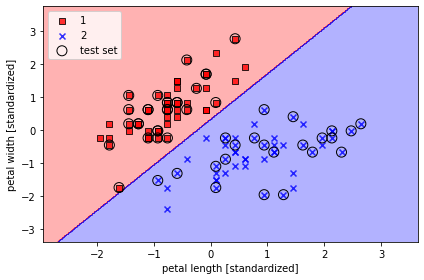

In [37]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(50, 100))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()